In [129]:
# Script for extract position of corona terms in debates, option to plot different parties.

import re, string,os
from glob import glob as gb
import pandas as pd
from tqdm import tqdm
from collections import Counter
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from functions import *
import statistics

plotting.style_('viridis',12)

base_path = "/home/ruben/Documents/GitHub/ParlaMintCase"

tf = pd.read_csv(base_path + '/resources/keywords-corona-translation.csv')
tf_corona = {language:dict(zip(tf[tf['language'] == language]['word'],tf[tf['language'] == language]['translation'])) for language in list(set(tf['language']))}

In [57]:
def plot_positions(lan,all_dates=True,**kwargs):
    std = []
    data = data_loader.full(lan,"lemmatized")
    data['date'] = [utils.find_date(x) for x in data['id']]
    data = utils.add_metadata(data,lan)
    #data = data[(data.id.str.contains('sejm'))].reset_index(drop=True)
    data = data[(data.id.str.contains('2020'))].reset_index(drop=True)
    days = utils.day_generator("2020-01-01","2020-08-31")
    rdf = []

    for d in days:
        t = data[data.date == d].reset_index(drop=True)
        if len(t) == 0:
            if all_dates == True:
                rdf.append([d,float("nan")])
            else:
                continue
        else:
            words_session = [str(x).split(' ') for x in t['text']]
            words_session = [item for sublist in words_session for item in sublist]
            indices = [round(c / len(words_session) * 100,2) for c,i in enumerate(words_session) if i in list(tf_corona[lan].values())]
            if len(indices) > 10:
                std.append([d,statistics.stdev(indices)])
            for i in indices:
                rdf.append([d,i])
    rdf = pd.DataFrame(rdf,columns=['date','index']).sort_values('date')
    fig,ax = plt.subplots(**kwargs)
    plt.scatter(rdf['index'],rdf['date'],alpha=0.5)
    plt.show()


found 717 files in: /home/ruben/Documents/GitHub/ParlaMintCase/data/original/bg/bg-ana-txt/


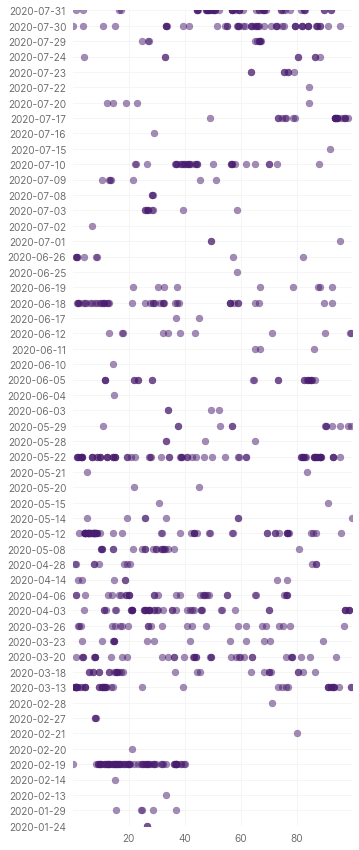

In [58]:
std = plot_positions("bg",all_dates=False,figsize=(5,15))

In [132]:
def plot_(lan, all_dates=True,**kwargs):
    data = data_loader.full(lan,"lemmatized")
    data['date'] = [utils.find_date(x) for x in data['id']]
    data = utils.add_metadata(data,lan)
    #data = data[(data.id.str.contains('sejm'))].reset_index(drop=True)
    data = data[(data.id.str.contains('2020'))].reset_index(drop=True)
    days = utils.day_generator("2020-01-01","2020-08-31")
    rdf = []

    for d in days:
        t = data[data.date == d].reset_index(drop=True)
        if len(t) == 0:
                if all_dates == True:
                    rdf.append([d,float("nan")])
                else:
                    continue
        else:
            words_session = [[w + "_" + t['speaker_party'][c] for w in str(x).split(' ')] for c,x in enumerate(t['text'])]
            words_session = [item for sublist in words_session for item in sublist]
            indices = [[i.split("_")[1],round(c / len(words_session) * 100,2)] for c,i in enumerate(words_session) if i.split("_")[0] in list(tf_corona[lan].values())]
            for i in indices:
                rdf.append([d,i[0],i[1]])
    rdf = pd.DataFrame(rdf,columns=['date','party','index']).sort_values('date')
    colors = {k:sns.color_palette('Paired',12)[c] for c,k in enumerate(list(set(rdf['party'])))}
    fig,ax = plt.subplots(**kwargs)
    plt.scatter(rdf['index'], rdf['date'], c=rdf['party'].map(colors),alpha=0.8,s=35)
    plt.show()


found 516 files in: /home/ruben/Documents/GitHub/ParlaMintCase/data/original/pl/pl-ana-txt/


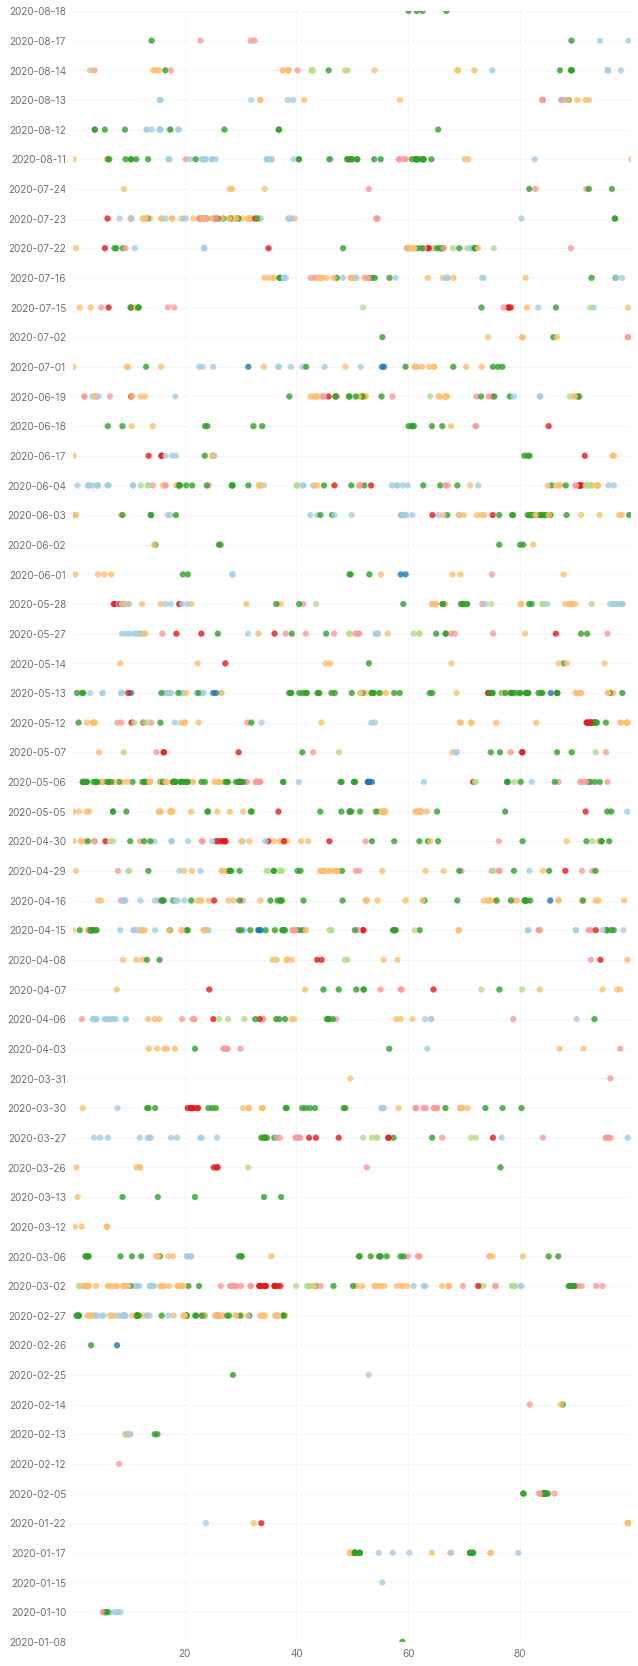

In [135]:
plot_('pl',all_dates=False,figsize=(10,30))